In [1]:
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt

def FT(x):
    return jnp.fft.fftshift(jnp.fft.fft2(jnp.fft.ifftshift(x)))

def iFT(x):
    return jnp.fft.fftshift(jnp.fft.ifft2(jnp.fft.ifftshift(x)))

## Gradient computation of the propagated field

Considering the space in which we work is real, we constrain the waves in the real space $\left( \mathcal{Re}(U) \right)$. We consider a certain geometry with $\Delta \epsilon_g$ and some defects in this geometry $\Delta \epsilon_d$:

$\mathcal{e}^{\pi i} - 1 < 0$

Imagine I have a confined gaussian beam comming from 

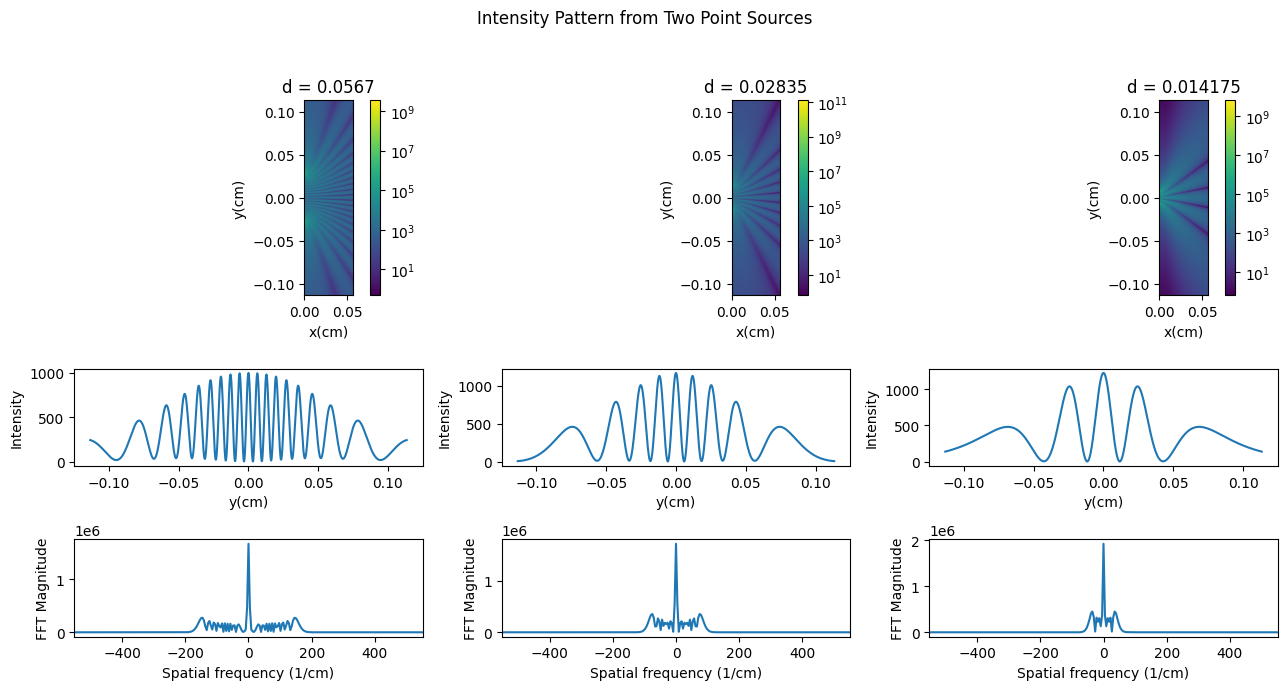

In [2]:
import matplotlib.pyplot as plt

Nz, Ny, Nx = (1000, 5000, 5000)
wavelength = 567e-7#1e-7
#sdv = 10

#dq_x_0 = jnp.linspace(0, 1 / wavelength, 100)
#dq_y_0 = jnp.linspace(0, 1 / wavelength, 100)
#dq_r_0 = jnp.linspace(0, 100)
#dz = jnp.sqrt((1 / wavelength**2) - dq_x_0**2 - dq_y_0**2)

x = jnp.linspace(0, 1000, Nx) * wavelength
y = jnp.linspace(-2000, 2000, Ny) * wavelength

Y, X = jnp.meshgrid(y, x, indexing='ij')

d = 1.5
r1 = jnp.sqrt((X)**2 + (Y - d / 2)**2)
r2 = jnp.sqrt((X)**2 + (Y + d / 2)**2)

E1 = jnp.exp(1j * (2 * jnp.pi / wavelength) * r1) / 1e-9+r1
E2 = jnp.exp(1j * (2 * jnp.pi / wavelength) * r2) / 1e-9+r2
E_tot = E1 + E2

extent = (x[0], x[-1], y[0], y[-1])

import matplotlib.colors as colors
# Values of d to plot (3 cases)
fig, axes = plt.subplots(
    3, 3,   # <-- ahora 3 filas
    figsize=(13, 7),
    dpi=100,
    gridspec_kw={'width_ratios': [1, 1, 1], 'height_ratios': [2, 1, 1]}
)

d_values = (1000 * wavelength, 500 * wavelength, 250 * wavelength)
dn = 1e-2

fig.suptitle("Intensity Pattern from Two Point Sources")

for i, d in enumerate(d_values):

    # Compute fields
    r1 = jnp.sqrt(X**2 + (Y - d/2)**2)
    r2 = jnp.sqrt(X**2 + (Y + d/2)**2)

    E1 = jnp.exp(1j * (2*jnp.pi*dn/wavelength) * r1) / r1
    E2 = jnp.exp(1j * (2*jnp.pi*dn/wavelength) * r2) / r2
    E_tot = E1 + E2

    # =============================================
    # --- Imshow panel (top row) ---
    # =============================================
    ax_im = axes[0, i]
    im = ax_im.imshow(jnp.abs(E_tot)**2, extent=extent,
                      norm=colors.LogNorm(), cmap="viridis")
    ax_im.set_title(f"d = {d}")
    ax_im.set_xlabel("x(cm)")
    ax_im.set_ylabel("y(cm)")

    # Ensanchar subplot
    pos = ax_im.get_position()
    ax_im.set_position([pos.x0 - 0.03, pos.y0, pos.width * 3, pos.height])

    fig.colorbar(im, ax=ax_im)

    # =============================================
    # --- Line cut panel (middle row) ---
    # =============================================
    signal = jnp.abs(E_tot[:, -1])**2

    ax_cut = axes[1, i]
    ax_cut.plot(y, signal)
    ax_cut.set_xlabel("y(cm)")
    ax_cut.set_ylabel("Intensity")

    # =============================================
    # --- FFT panel (bottom row) ---
    # =============================================

    # Compute FFT centered
    fft_vals = jnp.fft.fftshift(jnp.fft.fft(signal))
    fft_mag = jnp.abs(fft_vals)

    # Create frequency axis
    dy = y[1] - y[0]
    freqs = jnp.fft.fftshift(jnp.fft.fftfreq(len(signal), dy))

    ax_fft = axes[2, i]
    ax_fft.plot(freqs, fft_mag)
    ax_fft.set_xlabel("Spatial frequency (1/cm)")
    ax_fft.set_ylabel("FFT Magnitude")
    ax_fft.set_xlim([freqs.min() / 20, freqs.max() / 20])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [84]:
import numpy as np

x = jnp.linspace(-16, 16, Nx) * wavelength
y = jnp.linspace(-16, 16, Ny) * wavelength
Y, X = jnp.meshgrid(y, x, indexing='ij')

nsx, nsy = 16,16
Lx, Ly = 15 * wavelength, 15 * wavelength
xo = jnp.linspace(-Lx/2, Lx/2, nsx)
yo = jnp.linspace(-Ly/2, Ly/2, nsy)

E_i = jnp.zeros((Nx, Ny), dtype=jnp.complex128)


#for x_i in xo:
#    E_i += jnp.exp(1j * 2 * np.pi * jnp.sqrt((X - x_i)**2 + (Y - yo[0])**2) / wavelength) / jnp.sqrt((X - x_i)**2 + (Y - yo[0])**2)
#    E_i += jnp.exp(1j * 2 * np.pi * jnp.sqrt((X - x_i)**2 + (Y - yo[-1])**2) / wavelength) / jnp.sqrt((X - x_i)**2 + (Y - yo[-1])**2)
#for y_i in yo[1:-1]:
#    E_i += jnp.exp(1j * 2 * np.pi * jnp.sqrt((X - xo[0])**2 + (Y - y_i)**2) / wavelength) / jnp.sqrt((X - xo[0])**2 + (Y - y_i)**2)
#    E_i += jnp.exp(1j * 2 * np.pi * jnp.sqrt((X - xo[-1])**2 + (Y - y_i)**2) / wavelength) / jnp.sqrt((X - xo[-1])**2 + (Y - y_i)**2)
for x_i in xo:
    for y_i in yo:
        E_i += jnp.exp(1j * 2 * np.pi * jnp.sqrt((X - x_i)**2 + (Y - y_i)**2) / wavelength) #/ jnp.sqrt((X - x_i)**2 + (Y - y_i)**2)
print(E_i.min())


/tmp/ipykernel_1318/2335149161.py:12: UserWarning: Explicitly requested dtype <class 'jax.numpy.complex128'> requested in zeros is not available, and will be truncated to dtype complex64. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  E_i = jnp.zeros((Nx, Ny), dtype=jnp.complex128)


(-75.62789-7.3622007j)


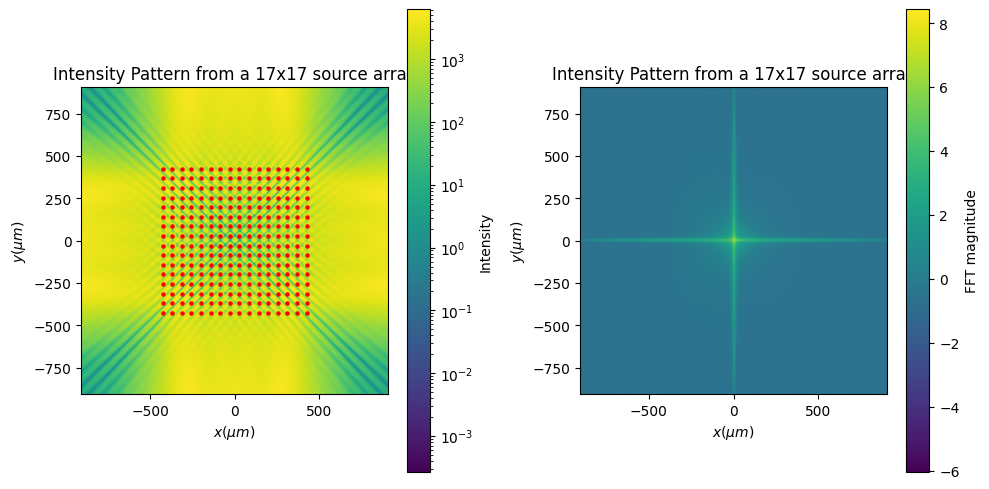

In [85]:
extent_xy = (x[0]*1e6, x[-1]*1e6, y[0]*1e6, y[-1]*1e6)

x_rep = np.repeat(xo, len(yo))
y_rep = np.tile(yo, len(xo))

fig, sub = plt.subplots(1,2, figsize=(10,5))
im = sub[0].imshow(jnp.abs(E_i)**2, extent=extent_xy, norm=colors.LogNorm(), cmap="viridis")

plt.colorbar(im, ax=sub[0],label="Intensity")
sub[0].set_xlabel("$x(\\mu m)$")
sub[0].set_ylabel("$y(\\mu m)$")
sub[0].set_title("Intensity Pattern from a 17x17 source array")
sub[0].scatter(x_rep * 1e6, y_rep * 1e6, color='red', s=5)

im_2 = sub[1].imshow(jnp.log10(jnp.abs(FT(E_i))), extent=extent_xy, cmap="viridis")
plt.colorbar(im_2, ax=sub[1], label="FFT magnitude")
sub[1].set_xlabel("$x(\\mu m)$")
sub[1].set_ylabel("$y(\\mu m)$")
sub[1].set_title("Intensity Pattern from a 17x17 source array")
plt.tight_layout()
plt.show()


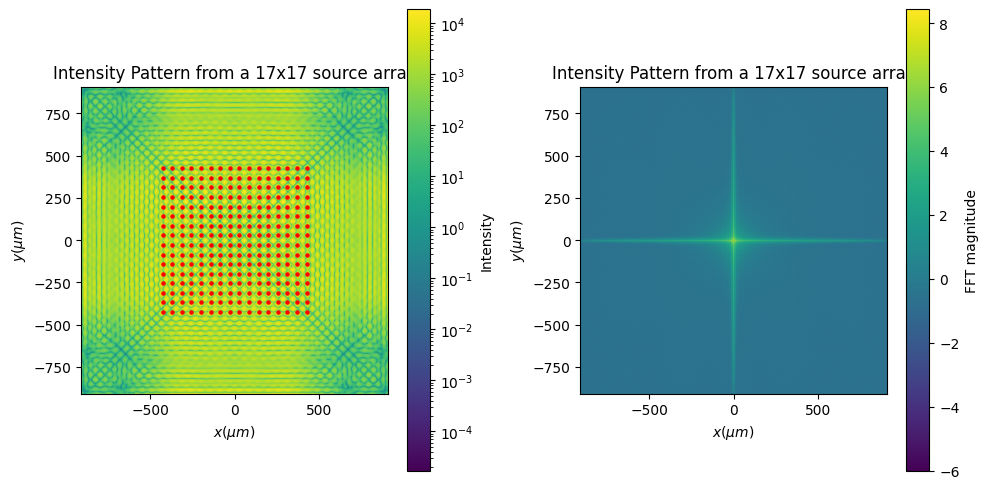

In [87]:
z = 3 * wavelength
qx = jnp.fft.fftshift(jnp.fft.fftfreq(Nx, d=(x[1]-x[0])))
qy = jnp.fft.fftshift(jnp.fft.fftfreq(Ny, d=(y[1]-y[0])))
QY, QX = jnp.meshgrid(qy, qx, indexing='ij')
E_prop = iFT(np.exp(2j * jnp.pi * z * jnp.sqrt((1 / wavelength**2 - QX**2 - QY**2) * ((1 / wavelength**2 - QX**2 - QY**2)>0))) * FT(E_i))

fig, sub = plt.subplots(1,2, figsize=(10,5))
im = sub[0].imshow(jnp.abs(E_prop)**2, extent=extent_xy, norm=colors.LogNorm(), cmap="viridis")
plt.colorbar(im, ax=sub[0],label="Intensity")
sub[0].set_xlabel("$x(\\mu m)$")
sub[0].set_ylabel("$y(\\mu m)$")
sub[0].set_title("Intensity Pattern from a 17x17 source array")

sub[0].scatter(x_rep * 1e6, y_rep * 1e6, color='red', s=5)

im_2 = sub[1].imshow(jnp.log10(jnp.abs(FT(E_prop))), extent=extent_xy, cmap="viridis")
plt.colorbar(im_2, ax=sub[1], label="FFT magnitude")
sub[1].set_xlabel("$x(\\mu m)$")
sub[1].set_ylabel("$y(\\mu m)$")
sub[1].set_title("Intensity Pattern from a 17x17 source array")
plt.tight_layout()
plt.show()


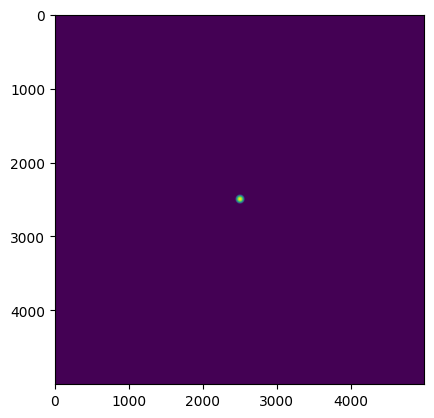

In [71]:

plt.figure()
plt.imshow((1 / wavelength**2 - QX**2 - QY**2) * ((1 / wavelength**2 - QX**2 - QY**2)>0))
plt.show()